<a href="https://colab.research.google.com/github/Jair-RM/Simulacion-2-Figols/blob/main/Ejercicio_03_Dic_(Grafica_valor_medio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.5187010054329846


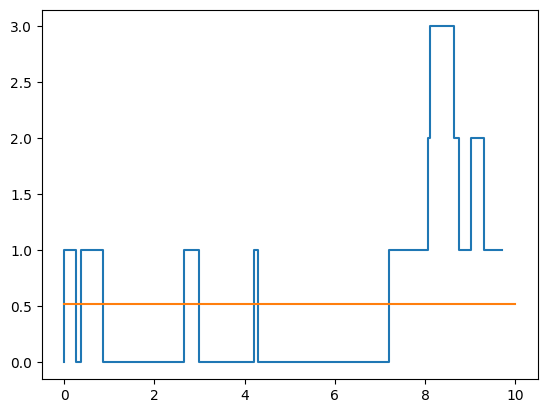

In [2]:
from math import log
from random import random
import matplotlib.pyplot as plt

T=10
l_l=1               # apha - promedio tiempo de salida
l_s=2             # lamnda - promedio de tiempo de llegada
t=0
infi=1000000000          # cualquier numero mayor al tiempo de simulacion
ts=infi     # tiempor en el que ocurrira la prixima salida
tl=0        # tiempor en el que ocurrira la prixima llegada
l=0
lt=[]
ll=[]

suma=0
lc=0
while min(tl,ts)<T:
  ta=t
  lt.append(t)       # lista del tiempo
  ll.append(l)       # lista de valores
  t=min(tl,ts)
  lt.append(t)       # lista del tiempo modificado
  ll.append(l)       ## lista de valores
  suma=suma+l*(t- ta)
  if t==tl:
    l=l+1
    #print("%10.3f"%tl, l)
    tl=t-(1/l_l)*log(random())
    if l==1:
      ts=t-(1/l_s)*log(random())
  else:
    l=l-1
    #print("               ", "%10.3f"%ts, l)
    if l==0:
      ts=infi
    else:
      ts=t-(1/l_s)*log(random())
suma=suma+l*(T- t)
vm=suma/T      # Valor medio
t=0
lx=[]
ly=[]
while t<T:
  lx. append(t)
  ly. append(vm)
  t=t+ T/100
print(vm)
plt.plot(lt,ll)
plt. plot(lx,ly)
plt.show()

1.6707395403981238 1.580234147094742
0.34120487184818005 4.196692823302072
1.6499978252678231 1.6914812555284244


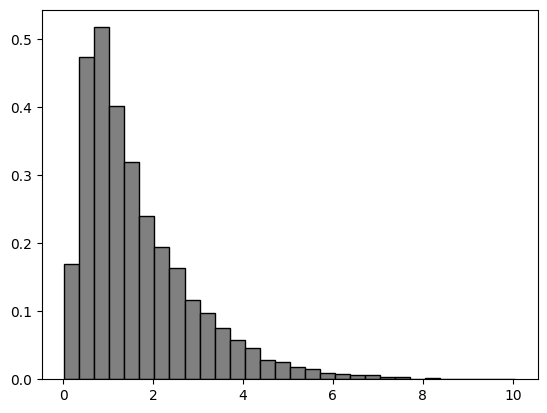

In [12]:
from math import log, sqrt
from random import random
import matplotlib.pyplot as plt
from statistics import mean, variance
import numpy as np

def f():
  T=8
  l_l=1               # apha - promedio tiempo de salida
  l_s=1.2             # lamnda - promedio de tiempo de llegada
  t=0
  infi=1000000000          # cualquier numero mayor al tiempo de simulacion
  ts=infi     # tiempor en el que ocurrira la prixima salida
  tl=0        # tiempor en el que ocurrira la prixima llegada
  l=0
  lt=[]
  ll=[]

  suma=0
  lc=0
  while min(tl,ts)<T:
    ta=t
    lt.append(t)       # lista del tiempo
    ll.append(l)       # lista de valores
    t=min(tl,ts)
    lt.append(t)       # lista del tiempo modificado
    ll.append(l)       ## lista de valores
    suma=suma+l*(t- ta)
    if t==tl:
      l=l+1
      #print("%10.3f"%tl, l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())
    else:
      l=l-1
      #print("               ", "%10.3f"%ts, l)
      if l==0:
        ts=infi
      else:
        ts=t-(1/l_s)*log(random())
  suma=suma+l*(T- t)
  vm=suma/T      # Valor medio
  return vm

nr=10000
l=[]
for i in range(nr):
  l. append(f())
m=mean(l)
v=variance(l)
print(m,v)
print(np.quantile(l, 0.05), np.quantile(l, 0.95))    # intervalo de confianza
print(m-1.65*sqrt(v/nr),m+1.65*sqrt(v/nr))   # intervalo de confianza del valoresperado
plt. hist(l, density=1, bins=30, color="grey", edgecolor="black")
plt. show()

9.517 16.267137713771376
5.0 17.0
9.450451309234708 9.58354869076529


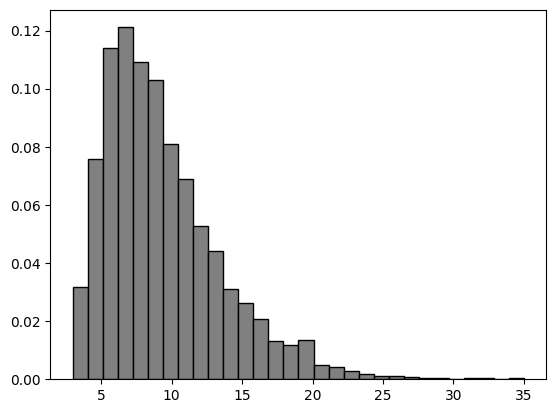

In [13]:
from math import log, sqrt
from random import random
import matplotlib.pyplot as plt
from statistics import mean, variance
import numpy as np
from numba import jit

@jit(nopython=True)
def f():
  T=60
  l_l=1
  l_s=1.2
  t=0
  infi=1000000000
  ts=infi
  tl=0
  l=0
  maxi=0
  while min(tl,ts)<T:
    if l>maxi:
      maxi=l
    t=min(tl,ts)
    if t==tl:
      l=l+1
      #print("%10.3f"%tl, l)
      tl=t-(1/l_l)*log(random())
      if l==1:
        ts=t-(1/l_s)*log(random())
    else:
      l=l-1
      #print("               ", "%10.3f"%ts, l)
      if l==0:
        ts=infi
      else:
        ts=t-(1/l_s)*log(random())
  return maxi

nr=10000
l=[]
for i in range(nr):
  l. append(f())
m=mean(l)
v=variance(l)
print(m,v)
print(np.quantile(l, 0.05), np.quantile(l, 0.95))    # intervalo de confianza
print(m-1.65*sqrt(v/nr),m+1.65*sqrt(v/nr))   # intervalo de confianza del valoresperado
plt. hist(l, density=1, bins=30, color="grey", edgecolor="black")
plt. show()

# < >